In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("./data/total/data.csv")

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib as plt
import seaborn as sns

encoder = LabelEncoder()
encoder.fit(df['Label'])

df["Label"] = encoder.transform(df['Label'])
df
# 2 == step, 1 == spin , 0 == jum

,Unnamed: 0,Label,Nose_x,Nose_y,Nose_z,Left Shoulder_x,Left Shoulder_y,Left Shoulder_z,Right Shoulder_x,Right Shoulder_y,...,Left Heel_z,Right Heel_x,Right Heel_y,Right Heel_z,Left Foot Index_x,Left Foot Index_y,Left Foot Index_z,Right Foot Index_x,Right Foot Index_y,Right Foot Index_z
0,0,2,0.648874,0.288281,0.078375,0.650936,0.305086,-0.021981,0.669060,0.297430,...,0.016120,0.719867,0.482608,-0.045735,0.656172,0.482029,0.010179,0.725682,0.496969,-0.053453
1,1,2,0.646172,0.284948,0.022417,0.649369,0.305608,-0.057565,0.663446,0.297785,...,0.061311,0.717175,0.481883,0.021821,0.652364,0.481814,0.055039,0.719685,0.492456,0.012921
2,2,2,0.641190,0.279885,0.013505,0.645446,0.304661,-0.064619,0.658485,0.297636,...,0.069112,0.706662,0.480622,0.030662,0.650032,0.480069,0.061149,0.711257,0.486973,0.021146
3,3,2,0.638023,0.278490,0.029947,0.640407,0.303865,-0.054934,0.656047,0.297165,...,0.047286,0.703047,0.476041,0.008026,0.646908,0.478127,0.040590,0.704286,0.482374,0.000934
4,4,2,0.633434,0.275024,0.023506,0.636033,0.302226,-0.055677,0.649261,0.296603,...,0.044904,0.696619,0.473995,0.009224,0.644056,0.477074,0.038813,0.695693,0.480755,0.000994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62648,62648,0,0.574775,0.368235,-0.086111,0.585259,0.412368,-0.140638,0.593886,0.404541,...,0.108873,0.588995,0.645317,0.225913,0.573598,0.658989,0.073421,0.568190,0.643400,0.206908
62649,62649,0,0.579735,0.370851,-0.084412,0.591714,0.411830,-0.140285,0.597315,0.405085,...,0.083183,0.592678,0.648556,0.206766,0.581658,0.663905,0.046970,0.571453,0.646194,0.186276
62650,62650,0,0.583178,0.371905,-0.089629,0.596387,0.411694,-0.144538,0.600910,0.406254,...,0.074247,0.596611,0.650171,0.206683,0.587681,0.664693,0.036304,0.574134,0.646979,0.186033
62651,62651,0,0.586235,0.373957,-0.094196,0.600107,0.414188,-0.148947,0.605313,0.408985,...,0.059404,0.599945,0.652425,0.210295,0.594330,0.666866,0.019750,0.577965,0.648006,0.188566


In [6]:
df = df.drop('Unnamed: 0', axis=1)

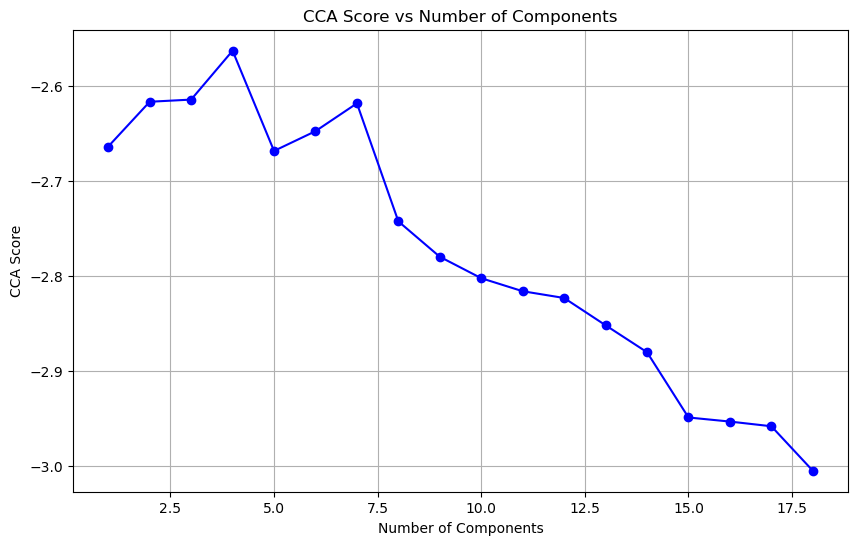

In [8]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 상체/하체 특성 정의
upper_body_features = [
    'Left Shoulder_x', 'Left Shoulder_y', 'Left Shoulder_z',
    'Right Shoulder_x', 'Right Shoulder_y', 'Right Shoulder_z',
    'Left Elbow_x', 'Left Elbow_y', 'Left Elbow_z',
    'Right Elbow_x', 'Right Elbow_y', 'Right Elbow_z',
    'Left Wrist_x', 'Left Wrist_y', 'Left Wrist_z',
    'Right Wrist_x', 'Right Wrist_y', 'Right Wrist_z'
]

lower_body_features = [
    'Left Hip_x', 'Left Hip_y', 'Left Hip_z',
    'Right Hip_x', 'Right Hip_y', 'Right Hip_z',
    'Left Knee_x', 'Left Knee_y', 'Left Knee_z',
    'Right Knee_x', 'Right Knee_y', 'Right Knee_z',
    'Left Ankle_x', 'Left Ankle_y', 'Left Ankle_z',
    'Right Ankle_x', 'Right Ankle_y', 'Right Ankle_z',
    'Left Foot Index_x', 'Left Foot Index_y', 'Left Foot Index_z',
    'Right Foot Index_x', 'Right Foot Index_y', 'Right Foot Index_z'
]

# 2. 데이터 준비
X_upper = df[upper_body_features]
X_lower = df[lower_body_features]
y_true = df['Label']

# 3. 데이터 스케일링
scaler = StandardScaler()
X_upper_scaled = scaler.fit_transform(X_upper)
X_lower_scaled = scaler.fit_transform(X_lower)



=== Correlation Analysis Results ===
 Component  Correlation (|r|)       p-value  Significant
         1           0.994909  0.000000e+00         True
         2           0.986713  0.000000e+00         True
         3           0.959716  0.000000e+00         True
         4           0.980851  0.000000e+00         True
         5           0.937491  0.000000e+00         True
         6           0.773393  0.000000e+00         True
         7           0.666036  0.000000e+00         True
         8           0.606990  0.000000e+00         True
         9           0.500113  0.000000e+00         True
        10           0.377929  0.000000e+00         True
        11           0.362917  0.000000e+00         True
        12           0.284985  0.000000e+00         True
        13           0.192454  0.000000e+00         True
        14           0.155853  0.000000e+00         True
        15           0.130215 5.397664e-235         True
        16           0.104664 4.257108e-152        

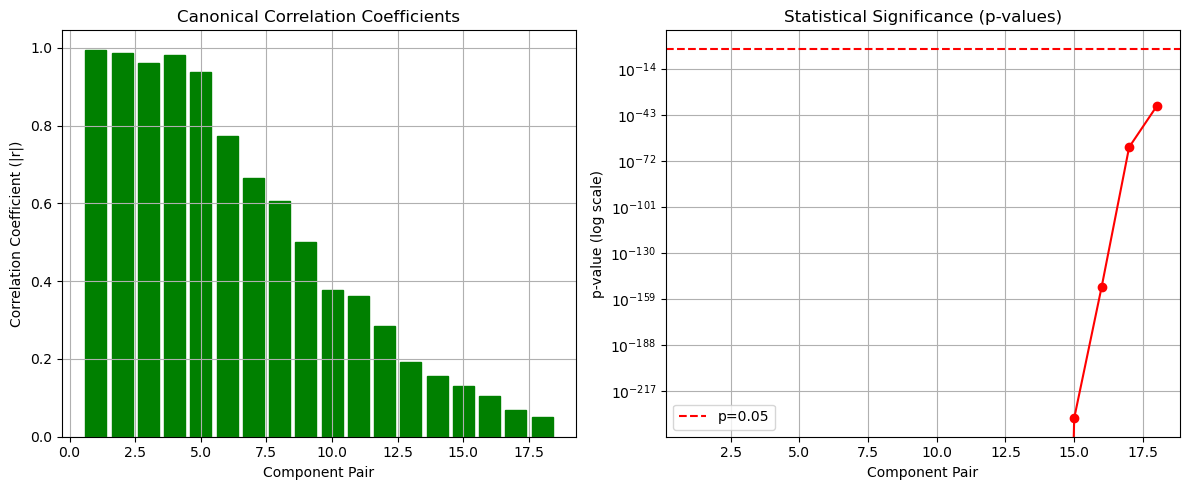

In [17]:
from scipy import stats
import pandas as pd

# CCA 적용
n_components = min(len(upper_body_features), len(lower_body_features))
cca = CCA(n_components=n_components)
X_upper_cca, X_lower_cca = cca.fit_transform(X_upper_scaled, X_lower_scaled)

# 각 컴포넌트 쌍의 상관계수(r)와 p값 계산
correlations = []
p_values = []

for i in range(n_components):
    r, p = stats.pearsonr(X_upper_cca[:, i], X_lower_cca[:, i])
    correlations.append(abs(r))
    p_values.append(p)

# 결과를 데이터프레임으로 정리
results_df = pd.DataFrame({
    'Component': range(1, n_components + 1),
    'Correlation (|r|)': correlations,
    'p-value': p_values
})

# 유의한 결과 표시 (p < 0.05)
results_df['Significant'] = results_df['p-value'] < 0.05

# 결과 출력
print("=== Correlation Analysis Results ===")
print(results_df.to_string(index=False))

# 시각화
plt.figure(figsize=(12, 5))

# 상관계수 그래프
plt.subplot(1, 2, 1)
bars = plt.bar(range(1, len(correlations) + 1), correlations)
plt.xlabel('Component Pair')
plt.ylabel('Correlation Coefficient (|r|)')
plt.title('Canonical Correlation Coefficients')
plt.grid(True)

# 유의한 상관관계 표시
for i, (bar, is_sig) in enumerate(zip(bars, results_df['Significant'])):
    if is_sig:
        bar.set_color('green')
    else:
        bar.set_color('red')

# p-value 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, len(p_values) + 1), p_values, 'ro-')
plt.axhline(y=0.05, color='r', linestyle='--', label='p=0.05')
plt.yscale('log')  # p-value를 로그 스케일로 표시
plt.xlabel('Component Pair')
plt.ylabel('p-value (log scale)')
plt.title('Statistical Significance (p-values)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 95% 설명력을 갖는 유의한 컴포넌트 수 찾기
sig_correlations = [corr if sig else 0 for corr, sig in zip(correlations, results_df['Significant'])]
cumulative_ratio = np.cumsum(sig_correlations) / sum(sig_correlations)
optimal_components = np.where(cumulative_ratio >= 0.95)[0][0] + 1


Elbow curve와 Silhouette score는 클러스터링에서 최적의 클러스터 수(k)를 결정하는 데 사용되는 두 가지 중요한 방법입니다:
Elbow Method (엘보우 방법):
Inertia(관성)를 사용: 각 데이터 포인트와 해당 클러스터 중심과의 거리 제곱의 합
작동 원리:
k가 증가할수록 inertia는 감소
그래프에서 "팔꿈치" 모양이 생기는 지점이 최적의 k
이 지점 이후로는 k를 증가시켜도 inertia가 크게 감소하지 않음

Silhouette Score (실루엣 점수):
각 클러스터의 밀집도와 분리도를 측정
-1에서 1 사이의 값:
1에 가까울수록: 클러스터가 잘 분리됨
0에 가까울수록: 클러스터가 겹침
-1에 가까울수록: 잘못된 클러스터링


Components with correlation < 0.8:
 Component  Correlation (|r|)       p-value  Significant
         6           0.773393  0.000000e+00         True
         7           0.666036  0.000000e+00         True
         8           0.606990  0.000000e+00         True
         9           0.500113  0.000000e+00         True
        10           0.377929  0.000000e+00         True
        11           0.362917  0.000000e+00         True
        12           0.284985  0.000000e+00         True
        13           0.192454  0.000000e+00         True
        14           0.155853  0.000000e+00         True
        15           0.130215 5.397664e-235         True
        16           0.104664 4.257108e-152         True
        17           0.067420  4.938939e-64         True
        18           0.051652  2.780311e-38         True


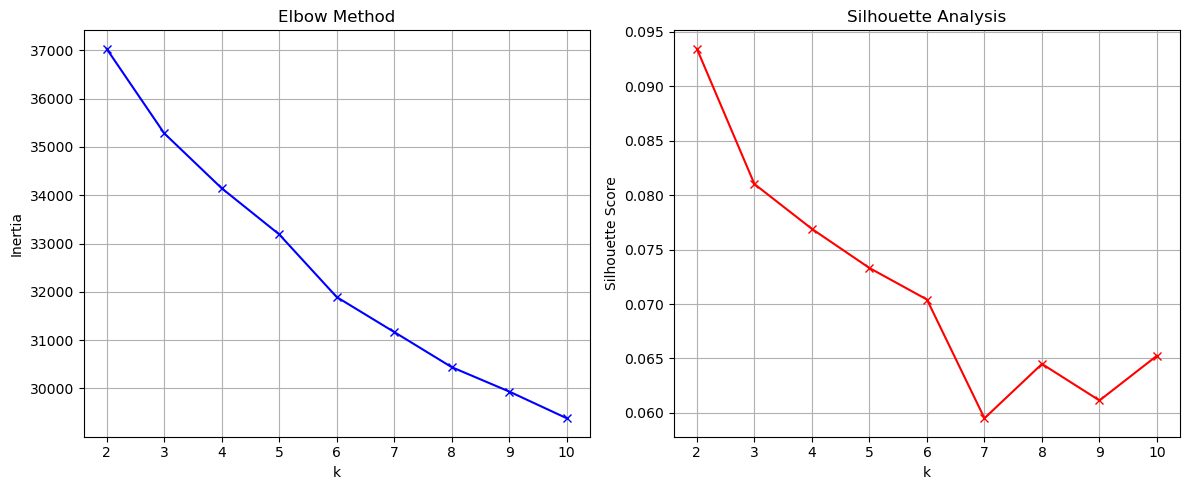


Optimal number of clusters (based on Silhouette score): 2


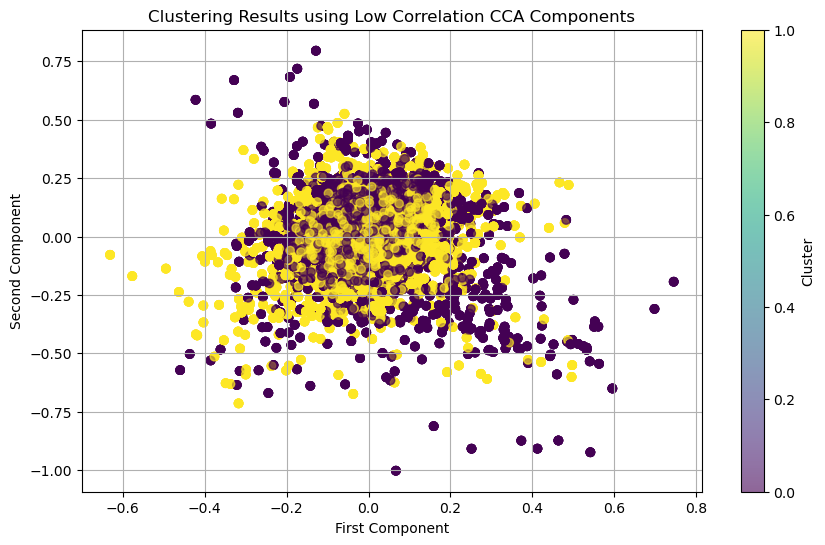


Samples per cluster:
Cluster 0: 31156 samples (49.73%)
Cluster 1: 31497 samples (50.27%)


AttributeError: 'int' object has no attribute 'columns'

In [19]:
# 상관계수가 0.8보다 낮은 컴포넌트만 선택
low_corr_components = results_df[results_df['Correlation (|r|)'] < 0.8]
print(f"\nComponents with correlation < 0.8:")
print(low_corr_components.to_string(index=False))

# 선택된 컴포넌트 인덱스 (0-based)
selected_indices = low_corr_components['Component'].values - 1

# 선택된 컴포넌트만으로 데이터 구성
X_selected = np.hstack([
    X_upper_cca[:, selected_indices],
    X_lower_cca[:, selected_indices]
])

# Elbow method와 Silhouette score를 사용한 최적 클러스터 수 찾기
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_selected, kmeans.labels_))

# 결과 시각화
plt.figure(figsize=(12, 5))

# Elbow curve
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

# 최적의 k 선택 (실루엣 점수가 가장 높은 값)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (based on Silhouette score): {optimal_k}")

# 최종 클러스터링 수행
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_selected)

# 클러스터링 결과 시각화 (첫 두 컴포넌트 사용)
if X_selected.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_selected[:, 0], X_selected[:, 1], 
                         c=cluster_labels, cmap='viridis',
                         alpha=0.6)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.title('Clustering Results using Low Correlation CCA Components')
    plt.grid(True)
    plt.show()

# 클러스터별 샘플 수 확인
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print("\nSamples per cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} samples ({count/len(cluster_labels)*100:.2f}%)")


In [20]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

ari = adjusted_rand_score(y_true, cluster_labels)
ami = adjusted_mutual_info_score(y_true, cluster_labels)

print("\nClustering evaluation with original labels:")
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Adjusted Mutual Information: {ami:.3f}")


Clustering evaluation with original labels:
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.001


In [23]:
for comp in low_corr_components['Component'].values:
    print(f"\n=== Feature Weights for Component {comp} (correlation: {correlations[comp-1]:.3f}) ===")
    cca_weights = pd.DataFrame({
        'Upper_Features': upper_body_features,
        'Weight': cca.x_weights_[:, 0]  
    })
    print(cca_weights.sort_values('Weight', ascending=False))


=== Feature Weights for Component 6 (correlation: 0.773) ===
      Upper_Features    Weight
6       Left Elbow_x  0.488546
8       Left Elbow_z  0.325533
11     Right Elbow_z  0.241135
1    Left Shoulder_y  0.238075
15     Right Wrist_x  0.118087
13      Left Wrist_y  0.029970
16     Right Wrist_y  0.028436
10     Right Elbow_y -0.053028
7       Left Elbow_y -0.064892
5   Right Shoulder_z -0.091879
9      Right Elbow_x -0.163057
17     Right Wrist_z -0.164337
14      Left Wrist_z -0.190114
12      Left Wrist_x -0.216316
4   Right Shoulder_y -0.282883
3   Right Shoulder_x -0.284667
2    Left Shoulder_z -0.291804
0    Left Shoulder_x -0.355909

=== Feature Weights for Component 7 (correlation: 0.666) ===
      Upper_Features    Weight
3   Right Shoulder_x  0.490727
0    Left Shoulder_x  0.426084
11     Right Elbow_z  0.346142
8       Left Elbow_z  0.207618
13      Left Wrist_y  0.133629
15     Right Wrist_x  0.095609
16     Right Wrist_y  0.056069
10     Right Elbow_y  0.008071
9      R


=== Random Forest Results ===
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3628
           1       1.00      1.00      1.00      4305
           2       1.00      1.00      1.00      4598

    accuracy                           1.00     12531
   macro avg       1.00      1.00      1.00     12531
weighted avg       1.00      1.00      1.00     12531


=== 5-Fold Cross Validation Results ===
Mean Accuracy: 1.000 (+/- 0.000)
Individual fold scores: [1. 1. 1. 1. 1.]

=== Best Random Forest Parameters ===
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 1.000


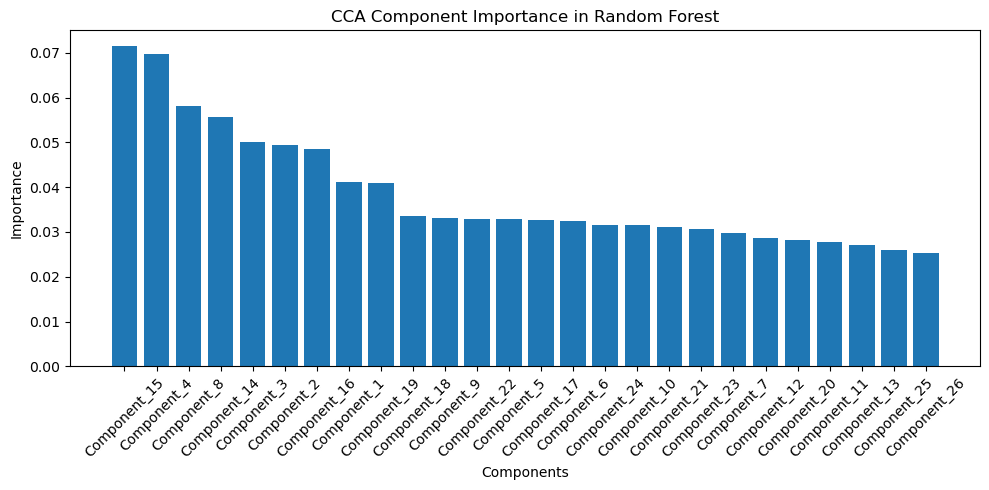


=== Feature Importance ===
         Feature  Importance
14  Component_15    0.071457
3    Component_4    0.069718
7    Component_8    0.058162
13  Component_14    0.055579
2    Component_3    0.050039
1    Component_2    0.049473
15  Component_16    0.048568
0    Component_1    0.041093
18  Component_19    0.040837
17  Component_18    0.033457
8    Component_9    0.033055
21  Component_22    0.032851
4    Component_5    0.032828
16  Component_17    0.032728
5    Component_6    0.032558
23  Component_24    0.031550
9   Component_10    0.031510
20  Component_21    0.031085
22  Component_23    0.030567
6    Component_7    0.029871
11  Component_12    0.028713
19  Component_20    0.028300
10  Component_11    0.027659
12  Component_13    0.027111
24  Component_25    0.025927
25  Component_26    0.025303


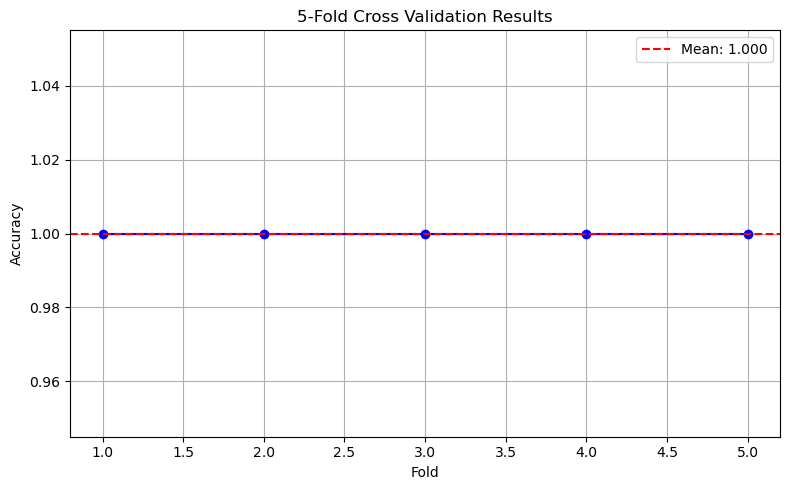

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# 1. 0.8 미만 상관계수를 가진 컴포넌트들의 데이터만 사용
X_combined = np.hstack([
    X_upper_cca[:, low_corr_components['Component'].values - 1],
    X_lower_cca[:, low_corr_components['Component'].values - 1]
])

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_true, 
    test_size=0.2, 
    random_state=42,
    stratify=y_true
)

# 3. Random Forest 모델 학습
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 4. 예측 및 성능 평가
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n=== Random Forest Results ===")
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. 5-fold 교차 검증
cv_scores = cross_val_score(rf, X_combined, y_true, cv=5)
print("\n=== 5-Fold Cross Validation Results ===")
print(f"Mean Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print("Individual fold scores:", cv_scores)

# 6. 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_combined, y_true)

print("\n=== Best Random Forest Parameters ===")
print(grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.3f}")

# 7. 최적 모델의 특성 중요도 분석
best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': [f'Component_{i+1}' for i in range(len(importances))],
    'Importance': importances
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('CCA Component Importance in Random Forest')
plt.xlabel('Components')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=== Feature Importance ===")
print(feature_importance)

# 8. 5-fold CV 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, 'bo-')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
plt.fill_between(range(1, 6), 
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(), 
                 alpha=0.2, color='b')
plt.title('5-Fold Cross Validation Results')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# 상관계수가 0.8 미만인 컴포넌트들 출력
print("\nComponents with correlation < 0.8:")
print(low_corr_components[['Component', 'Correlation (|r|)']])


Components with correlation < 0.8:
    Component  Correlation (|r|)
5           6           0.773393
6           7           0.666036
7           8           0.606990
8           9           0.500113
9          10           0.377929
10         11           0.362917
11         12           0.284985
12         13           0.192454
13         14           0.155853
14         15           0.130215
15         16           0.104664
16         17           0.067420
17         18           0.051652



Components with correlation < 0.7:
    Component  Correlation (|r|)        p-value
6           7           0.666036   0.000000e+00
7           8           0.606990   0.000000e+00
8           9           0.500113   0.000000e+00
9          10           0.377929   0.000000e+00
10         11           0.362917   0.000000e+00
11         12           0.284985   0.000000e+00
12         13           0.192454   0.000000e+00
13         14           0.155853   0.000000e+00
14         15           0.130215  5.397664e-235
15         16           0.104664  4.257108e-152
16         17           0.067420   4.938939e-64
17         18           0.051652   2.780311e-38

=== Random Forest Results ===
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3628
           1       1.00      1.00      1.00      4305
           2       1.00      1.00      1.00      4598

    accuracy                           1.00     125

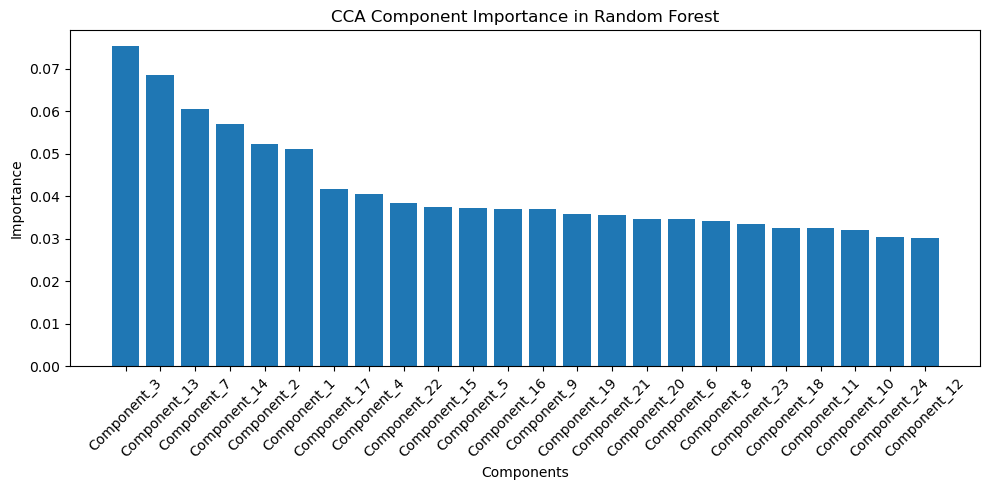


=== Feature Importance ===
         Feature  Importance
2    Component_3    0.075260
12  Component_13    0.068493
6    Component_7    0.060459
13  Component_14    0.056971
1    Component_2    0.052177
0    Component_1    0.051098
16  Component_17    0.041604
3    Component_4    0.040537
21  Component_22    0.038434
14  Component_15    0.037434
4    Component_5    0.037327
15  Component_16    0.037093
8    Component_9    0.036897
18  Component_19    0.035885
20  Component_21    0.035621
19  Component_20    0.034707
5    Component_6    0.034561
7    Component_8    0.034245
22  Component_23    0.033500
17  Component_18    0.032504
10  Component_11    0.032423
9   Component_10    0.032133
23  Component_24    0.030370
11  Component_12    0.030266


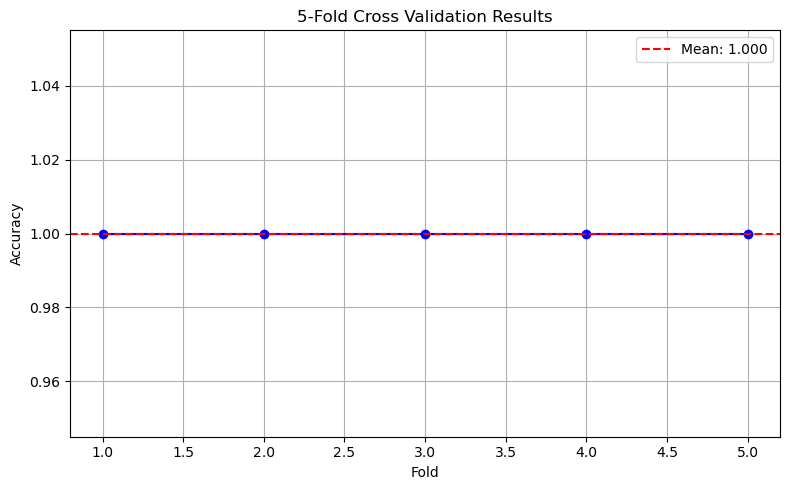

In [26]:
# 상관계수가 0.7 미만인 컴포넌트만 선택
threshold = 0.7
low_corr_components = results_df[results_df['Correlation (|r|)'] < threshold]
print(f"\nComponents with correlation < 0.7:")
print(low_corr_components[['Component', 'Correlation (|r|)', 'p-value']])

# 선택된 컴포넌트들의 데이터만 사용
X_combined = np.hstack([
    X_upper_cca[:, low_corr_components['Component'].values - 1],
    X_lower_cca[:, low_corr_components['Component'].values - 1]
])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_true, 
    test_size=0.2, 
    random_state=42,
    stratify=y_true
)

# Random Forest 모델 학습
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n=== Random Forest Results ===")
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5-fold 교차 검증
cv_scores = cross_val_score(rf, X_combined, y_true, cv=5)
print("\n=== 5-Fold Cross Validation Results ===")
print(f"Mean Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print("Individual fold scores:", cv_scores)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_combined, y_true)

print("\n=== Best Random Forest Parameters ===")
print(grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.3f}")

# 최적 모델의 특성 중요도 분석
best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': [f'Component_{i+1}' for i in range(len(importances))],
    'Importance': importances
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('CCA Component Importance in Random Forest')
plt.xlabel('Components')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=== Feature Importance ===")
print(feature_importance)

# 5-fold CV 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, 'bo-')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
plt.fill_between(range(1, 6), 
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(), 
                 alpha=0.2, color='b')
plt.title('5-Fold Cross Validation Results')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# 5-fold 교차 검증
cv_scores = cross_val_score(rf, X_combined, y_true, cv=5)
print("\n=== 5-Fold Cross Validation Results ===")
print(f"Mean Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print("Individual fold scores:", cv_scores)



=== 5-Fold Cross Validation Results ===
Mean Accuracy: 1.000 (+/- 0.000)
Individual fold scores: [1. 1. 1. 1. 1.]
